#### Langgraph Intro

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

In [3]:
def function1(input1):
    return input1 +" " +"from first function" 

In [4]:
def function2(input2):
    return input2 +" "+"from second function"

In [5]:
def function3(input3):
    return input3 +" "+"from third function"

In [6]:
function1("Gaurav")

'Gaurav from first function'

In [7]:
function2("Gaurav")

'Gaurav from second function'

In [8]:
function3("Gaurav")

'Gaurav from third function'

In [9]:
from langgraph.graph import Graph

In [10]:
workflow = Graph()

In [11]:
workflow.add_node('func1', function1)


In [12]:
workflow.add_node("func2", function2)

In [13]:
workflow.add_edge("func1", "func2")

In [14]:
workflow.set_entry_point("func1")

In [15]:
workflow.set_finish_point("func2")

In [16]:
app = workflow.compile()

In [17]:
app.get_graph()

Graph(nodes={'func1': Node(id='func1', name='func1', data=func1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'func2': Node(id='func2', name='func2', data=func2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='func1', data=None, conditional=False), Edge(source='func1', target='func2', data=None, conditional=False), Edge(source='func2', target='__end__', data=None, conditional=False)])

In [18]:
from IPython.display import Image, display

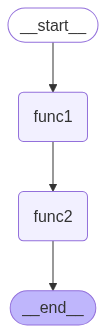

In [19]:
display(Image(app.get_graph().draw_mermaid_png()))

In [20]:
app.invoke("Hi this is Gaurav!")

'Hi this is Gaurav! from first function from second function'

In [21]:
for output in app.stream("Hi this is Gaurav!"):
    for key, value in output.items():
        print(f"Here is the output from {key}")
        print("\n")
        print(value)
        print("\n")


Here is the output from func1


Hi this is Gaurav! from first function


Here is the output from func2


Hi this is Gaurav! from first function from second function




In [22]:
def llm(input):
    model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    output = model.invoke(input)
    return output.content

In [23]:
def token_counter(input):
    token = input.split()
    token_number = len(token)
    return f"Total tokens generated in answer is {token_number}"

In [24]:
workflow1 = Graph()

In [25]:
workflow1.add_node("My LLM", llm)

In [26]:
workflow1.add_node("LLM_Output_token_counter", token_counter)

In [27]:
workflow1.add_edge("My LLM", "LLM_Output_token_counter")

In [28]:
workflow1.set_entry_point("My LLM")

In [29]:
workflow1.set_finish_point("LLM_Output_token_counter")

In [30]:
app = workflow1.compile()

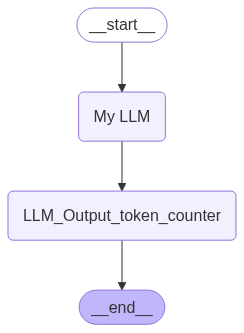

In [31]:
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
app.invoke("can you tell me about the india's capital")

'Total tokens generated in answer is 153'

In [33]:
app.invoke("What happend in RCB Victory event?")

'Total tokens generated in answer is 158'